In [1]:
import scipy.integrate as integrate
from math import *
from numpy import sqrt, pi
from sympy import *
init_printing()
from IPython.display import display

In [2]:
# Exercise 1

In [3]:
x = symbols('x')
func = lambda x: (e**x)


In [4]:
def T(n,x):
    if(n == 0):
        return 1
    elif (n == 1):
        return x
    return 2*x *T(n-1,x) - T(n-2,x)

In [5]:
def C(foo,n):
    fun = func
    if n == 0:
        return integrate((1/pi)*fun(x)/(1-x**2)**0.5,(x,-1,1)).evalf(6)
    else:
        return integrate((2/pi)*fun(x)*T(n,x)/(1-x**2)**0.5,(x,-1,1)).evalf(6)

In [6]:
C(func,1)

In [7]:
def Chebyshev(f1,n):
    print('\nn\tCn\n')
    for i in range(n):
        print('%d\t%0.12f\n' %(i, C(f1,i)))
    f = IndexedBase("f")
    i = Idx('i')
    for i in range(n):
        ans = 0
        display(f[i])
        print("=")
        if i == 0:
            ans = ans + C(f1,i)*T(i,x)
            display(ans)
        else:
            for j in range(i+1):
                ans = ans + C(f1,j)*T(j,x)
            display(ans)        
    

In [8]:
def ChebyshevUse(f1,n):
    
    ans = 0
    for j in range(n,-1,-1):
        ans = ans + C(f1,j)*T(j,x)
        
    return ans

In [9]:
ChebyshevUse(func,0)

In [10]:
def Y2(f1,ind,xv):
    expr = ChebyshevUse(f1,ind)
    return expr.subs(x,xv)
Y2(func,0,-1)

In [18]:
import matplotlib.pyplot as plt
import numpy as num
%matplotlib inline

In [32]:
xx = [-1, -0.5, 0, 0.5, 1]
yy = []
yy.extend([func(-1), func(-0.5),func(0),func(0.5), func(1)])

y2 = []
y2.extend([Y2(func,0,-1),Y2(func,0,-0.5),Y2(func,0,0),Y2(func,0,0.5),Y2(func,0,1)])

ry2 = []
ry2.extend([-func(-1)+Y2(func,0,-1),-func(-0.5)+Y2(func,0,-0.5),-func(0)+Y2(func,0,0),-func(0.5)+Y2(func,0,0.5),-func(1)+Y2(func,0,1)])
#------------------------------------------------------------------------------------------------------------

y21 = []
y21.extend([Y2(func,1,-1),Y2(func,1,-0.5),Y2(func,1,0),Y2(func,1,0.5),Y2(func,1,1)])

ry21 = []
ry21.extend([-func(-1)+Y2(func,1,-1),-func(-0.5)+Y2(func,1,-0.5),-func(0)+Y2(func,1,0),-func(0.5)+Y2(func,1,0.5),-func(1)+Y2(func,1,1)])
#------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------

y23 = []
y23.extend([Y2(func,3,-1),Y2(func,3,-0.5),Y2(func,3,0),Y2(func,3,0.5),Y2(func,3,1)])

ry23 = []
ry23.extend([-func(-1)+Y2(func,3,-1),-func(-0.5)+Y2(func,3,-0.5),-func(0)+Y2(func,3,0),-func(0.5)+Y2(func,3,0.5),-func(1)+Y2(func,3,1)])
#------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------

y25 = []
y25.extend([Y2(func,5,-1),Y2(func,5,-0.5),Y2(func,5,0),Y2(func,5,0.5),Y2(func,5,1)])

ry25 = []
ry25.extend([-func(-1)+Y2(func,5,-1),-func(-0.5)+Y2(func,5,-0.5),-func(0)+Y2(func,5,0),-func(0.5)+Y2(func,5,0.5),-func(1)+Y2(func,5,1)])

In [ ]:
#------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------

y210 = []
y210.extend([Y2(func,10,-1),Y2(func,10,-0.5),Y2(func,10,0),Y2(func,10,0.5),Y2(func,10,1)])

ry25 = []
ry25.extend([-func(-1)+Y2(func,10,-1),-func(-0.5)+Y2(func,10,-0.5),-func(0)+Y2(func,10,0),-func(0.5)+Y2(func,10,0.5),-func(1)+Y2(func,10,1)])

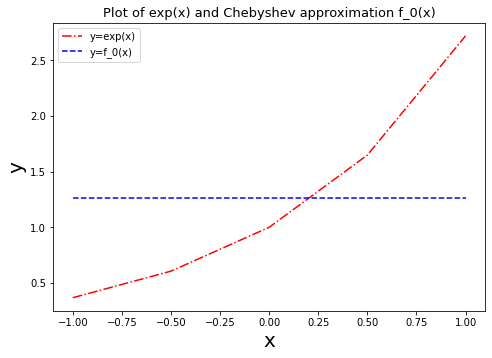

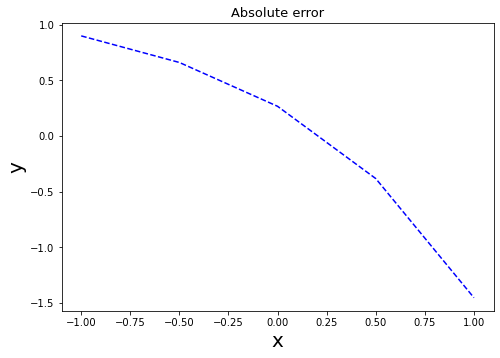

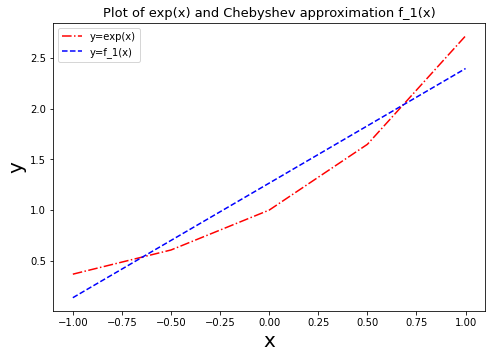

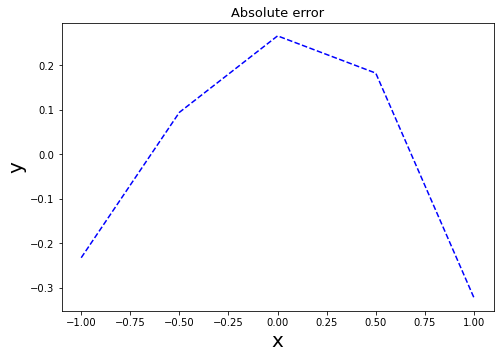

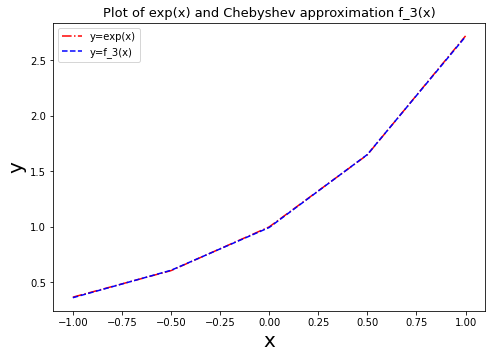

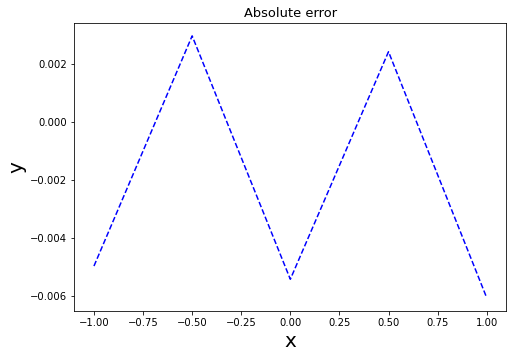

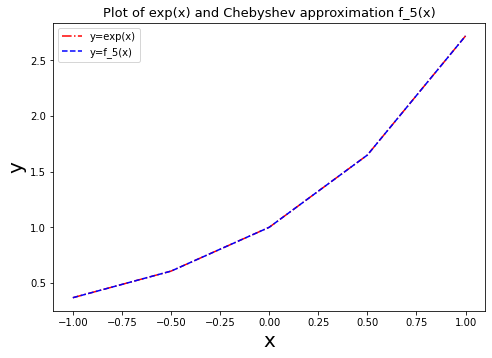

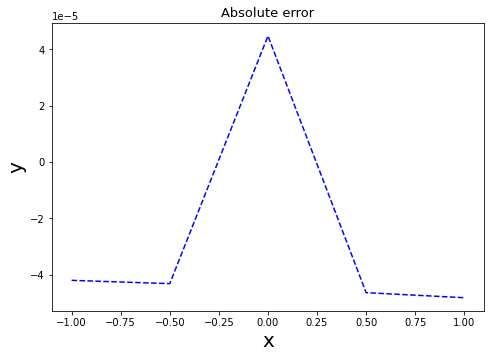

In [34]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_title('Plot of exp(x) and Chebyshev approximation f_0(x)',fontsize=13)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
plt.plot(xx,yy,'-.r',label='y=exp(x)')
plt.plot(xx,y2,'--b',label='y=f_0(x)')
ax.legend()


fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_title('Absolute error',fontsize=13)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
plt.plot(xx,ry2,'--b')
# ---------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------
#----------------------------------------------------------------------------------
# F1

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_title('Plot of exp(x) and Chebyshev approximation f_1(x)',fontsize=13)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
plt.plot(xx,yy,'-.r',label='y=exp(x)')
plt.plot(xx,y21,'--b',label='y=f_1(x)')
ax.legend()
#----------------
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_title('Absolute error',fontsize=13)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
plt.plot(xx,ry21,'--b')
# ---------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------
#----------------------------------------------------------------------------------
# F3

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_title('Plot of exp(x) and Chebyshev approximation f_3(x)',fontsize=13)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
plt.plot(xx,yy,'-.r',label='y=exp(x)')
plt.plot(xx,y23,'--b',label='y=f_3(x)')
ax.legend()
#----------------
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_title('Absolute error',fontsize=13)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
plt.plot(xx,ry23,'--b')
#ax.legend()
# ---------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------
#----------------------------------------------------------------------------------
# F5

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_title('Plot of exp(x) and Chebyshev approximation f_5(x)',fontsize=13)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
plt.plot(xx,yy,'-.r',label='y=exp(x)')
plt.plot(xx,y25,'--b',label='y=f_5(x)')
ax.legend()
#----------------
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_title('Absolute error',fontsize=13)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
plt.plot(xx,ry25,'--b')
#ax.legend()

In [ ]:
# ---------------------------------------------------------------------------------
#----------------------------------------------------------------------------------
# F10

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_title('Plot of exp(x) and Chebyshev approximation f_10(x)',fontsize=13)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
plt.plot(xx,yy,'-.r',label='y=exp(x)')
plt.plot(xx,y210,'--b',label='y=f_10(x)')
ax.legend()
#----------------
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_title('Absolute error',fontsize=13)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
plt.plot(xx,ry210,'--b')
#ax.legend()

In [ ]:
print(1)